## Loading MNIST dataset
The MNIST dataset (a classic in the Machine Learning community) has been around almost as long as the field itself and has been intensively studied. 

It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 


In [1]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# Having a look at Training Data
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
# Having a look at Test Data
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [4]:
# Exemining one specific image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

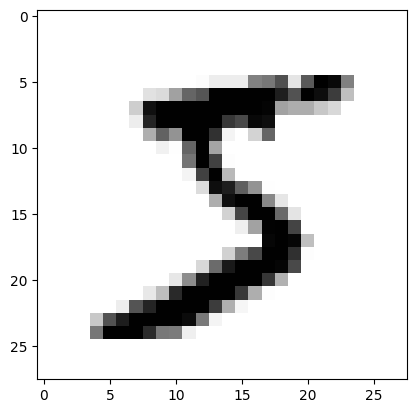

In [5]:
# Displaying the item from the training dataset
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
type(train_images[0])

numpy.ndarray

In [7]:
train_images[0].shape

(28, 28)

## Simple densely connected NN

In [8]:
# NN Architecture
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [9]:
# Compilation step
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [10]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2639 - accuracy: 0.9239
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1071 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0706 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0513 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0377 - accuracy: 0.9884


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 72ms/step


array([5.30632285e-08, 1.02628075e-08, 7.06993387e-06, 1.68599145e-04,
       7.04474395e-11, 6.79134473e-08, 3.48398892e-12, 9.99803364e-01,
       7.15669017e-08, 2.07602407e-05], dtype=float32)

In [14]:
predictions[0].argmax() 

7

In [15]:
predictions[0][7] 

0.99980336

In [16]:
test_labels[0] 

7

In [17]:
# Evaluating the model on new (test) data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9768
test_acc: 0.9768000245094299


In [18]:
# To see the weights of a trained model, let's use the get_weights() method:
weights = model.get_weights()

# 'weights' is a list containing weight tensors
for layer_weights in weights:
    print(layer_weights)

[[ 0.03753673 -0.0088299   0.06452774 ...  0.03971457 -0.02805002
  -0.01582826]
 [-0.06238831 -0.05637626 -0.01413833 ...  0.01529978 -0.0342121
   0.0126633 ]
 [ 0.04360494 -0.04884163 -0.02022194 ... -0.04309906 -0.02087988
  -0.04462364]
 ...
 [ 0.05170282  0.02736858 -0.05226298 ...  0.03989232  0.05302822
   0.06137109]
 [ 0.00784708 -0.03951211 -0.02597876 ...  0.03035514  0.01284397
  -0.04288993]
 [ 0.03271173  0.02799875 -0.01251637 ... -0.00925476  0.0174012
  -0.00941001]]
[-8.17375258e-03  2.94042733e-02 -3.48440297e-02  9.33821779e-03
  4.68740612e-03  5.63526191e-02 -1.92742255e-02  4.57152314e-02
  4.09476273e-02 -2.47359904e-03  1.48737486e-02  4.52757441e-03
  1.22533776e-02  1.31796096e-02 -7.30976928e-04  4.74977419e-02
  4.67478950e-03 -7.36768299e-04  8.56867656e-02 -4.45314758e-02
  6.01563836e-03  5.58149479e-02 -1.93201993e-02 -1.04996013e-02
 -8.36118683e-03  5.34282112e-03  3.44192609e-02  3.61161307e-02
 -3.78482342e-02  5.59975244e-02 -4.45003323e-02  2.557

In [19]:
len(weights)

4

In [20]:
for layer_weights in weights:
    print(layer_weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


## Initializing random weights and creating NN with those weights

In [21]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

input = 28*28
hidden = 512
output = 10

weights_1 = np.random.rand(input*hidden).reshape(input, hidden)
biases_1 = np.random.rand(hidden).reshape(hidden,)
weights_2 = np.random.rand(hidden*output).reshape(hidden, output)
biases_2 = np.random.rand(output).reshape(output,)

weights_list = [weights_1, biases_1, weights_2, biases_2]

# Print the shapes of the weight arrays
for weights in weights_list:
    print(weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


In [22]:
# Defining the architecture of a neural network
nn = keras.Sequential([
 layers.Dense(512, activation="relu", input_shape=(784,)),
 layers.Dense(10, activation="softmax")
])

In [23]:
# Setting the weights of the model 
nn.set_weights(weights_list)

# Compiling the model 
nn.compile(optimizer="rmsprop",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [24]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Evaluating the model on train data
test_loss, test_acc = nn.evaluate(train_images, train_labels)

1875/1875 [==============================] - 5s 2ms/step - loss: 795.9622 - accuracy: 0.0904


In [26]:
# Evaluating the model on new (test) data
test_loss, test_acc = nn.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 805.0311 - accuracy: 0.0892
test_acc: 0.08919999748468399
